In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Load datasets
df1 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df2 = pd.read_csv("Unemployment in India.csv")

print("Dataset 1 shape:", df1.shape)
print("Dataset 2 shape:", df2.shape)

df1.head()


Dataset 1 shape: (267, 9)
Dataset 2 shape: (768, 7)


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
import pandas as pd

df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
print(df.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [6]:
# Load dataset
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

# Remove spaces from column names
df.columns = df.columns.str.strip()

# Check again
print(df.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [7]:
# Convert Date column
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Extract Year and Month
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

df[["Date", "Year", "Month"]].head()


/tmp/ipython-input-3927538906.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


,Date,Year,Month
0,2020-01-31,2020,1
1,2020-02-29,2020,2
2,2020-03-31,2020,3
3,2020-04-30,2020,4
4,2020-05-31,2020,5


In [8]:
import pandas as pd

df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

# Clean column names (remove spaces)
df.columns = df.columns.str.strip()

# Check again
print(df.columns)
df.head()


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [9]:
# Data types and null values
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None
Region                                     0
Date         

In [10]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Extract time features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

df[["Date", "Year", "Month"]].head()


/tmp/ipython-input-2310357144.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


,Date,Year,Month
0,2020-01-31,2020,1
1,2020-02-29,2020,2
2,2020-03-31,2020,3
3,2020-04-30,2020,4
4,2020-05-31,2020,5


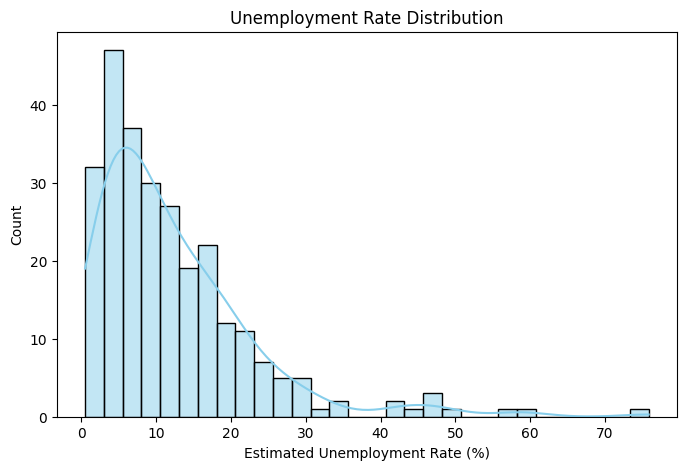

/tmp/ipython-input-1044007269.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y="Region", x="Estimated Unemployment Rate (%)", data=df, ci=None, palette="viridis")
/tmp/ipython-input-1044007269.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Region", x="Estimated Unemployment Rate (%)", data=df, ci=None, palette="viridis")


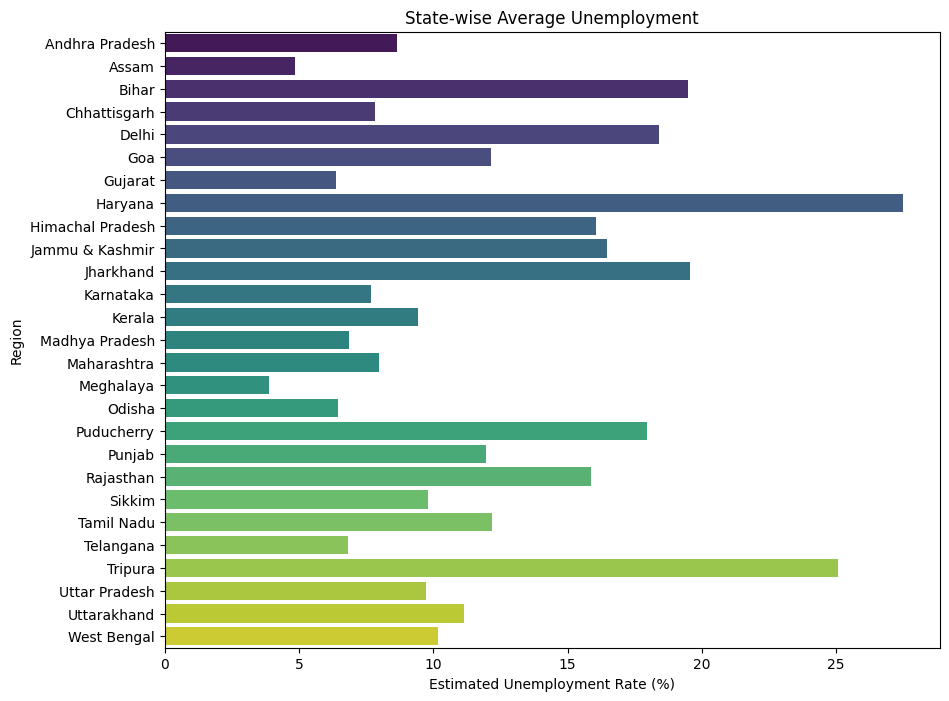

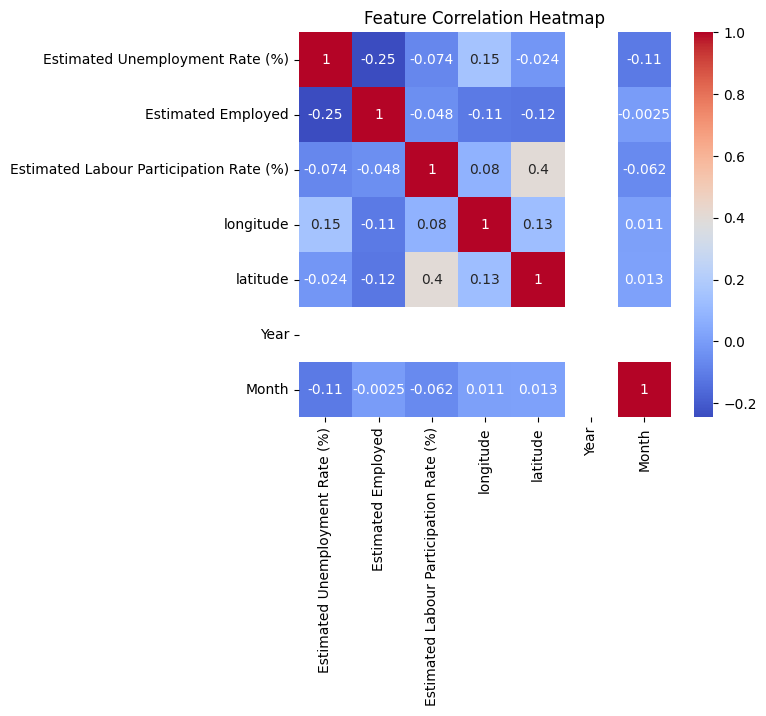

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Unemployment Rate
plt.figure(figsize=(8,5))
sns.histplot(df["Estimated Unemployment Rate (%)"], kde=True, bins=30, color="skyblue")
plt.title("Unemployment Rate Distribution")
plt.show()

# State-wise average unemployment
plt.figure(figsize=(10,8))
sns.barplot(y="Region", x="Estimated Unemployment Rate (%)", data=df, ci=None, palette="viridis")
plt.title("State-wise Average Unemployment")
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [12]:
# Features (Independent Variables)
X = df[["Estimated Employed", "Estimated Labour Participation Rate (%)", "Year", "Month"]]

# Target (Dependent Variable)
y = df["Estimated Unemployment Rate (%)"]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 7.373567118928895
MSE: 92.05320866050555
R² Score: 0.021491522331045232


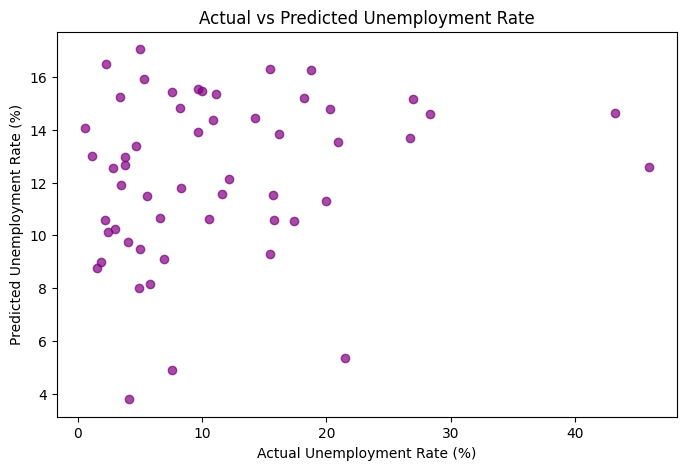

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7, color="purple")
plt.xlabel("Actual Unemployment Rate (%)")
plt.ylabel("Predicted Unemployment Rate (%)")
plt.title("Actual vs Predicted Unemployment Rate")
plt.show()


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [18]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"📊 {name} Results")
    print("MAE:", mae)
    print("MSE:", mse)
    print("R² Score:", r2)
    print("-"*40)

    return {"Model": name, "MAE": mae, "MSE": mse, "R²": r2}


In [19]:
results = []

# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
results.append(evaluate_model("Linear Regression", lr, X_train, X_test, y_train, y_test))

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
results.append(evaluate_model("Decision Tree", dt, X_train, X_test, y_train, y_test))

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
results.append(evaluate_model("Random Forest", rf, X_train, X_test, y_train, y_test))

# Support Vector Regressor
svr = SVR(kernel="rbf")
results.append(evaluate_model("SVR", svr, X_train, X_test, y_train, y_test))


📊 Linear Regression Results
MAE: 7.373567118928895
MSE: 92.05320866050555
R² Score: 0.021491522331045232
----------------------------------------
📊 Decision Tree Results
MAE: 5.130925925925927
MSE: 52.10983888888888
R² Score: 0.4460821098502584
----------------------------------------
📊 Random Forest Results
MAE: 4.769964814814816
MSE: 45.54033115944449
R² Score: 0.5159147544795277
----------------------------------------
📊 SVR Results
MAE: 6.594516324490159
MSE: 92.61948473550338
R² Score: 0.01547211303342877
----------------------------------------


In [20]:
results_df = pd.DataFrame(results)
print(results_df)


               Model       MAE        MSE        R²
0  Linear Regression  7.373567  92.053209  0.021492
1      Decision Tree  5.130926  52.109839  0.446082
2      Random Forest  4.769965  45.540331  0.515915
3                SVR  6.594516  92.619485  0.015472


/tmp/ipython-input-2805755032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R²", data=results_df, palette="coolwarm")


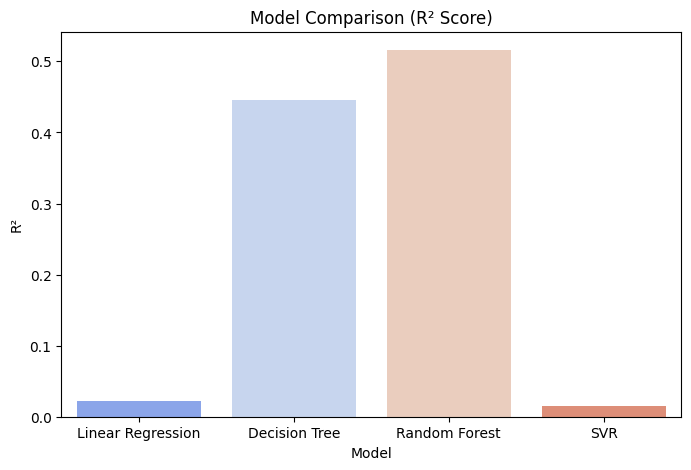

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="R²", data=results_df, palette="coolwarm")
plt.title("Model Comparison (R² Score)")
plt.show()
